# Homework 7: Studying Employee Attrition With K-Means

Name: Tara Renduchintala

Student ID:475586

Collaborators:


## Instructions

In this homework, we will be exploring a more realistic application of clustering. It might be helpful to review **Lab 7 (K-Means Clustering)** first. Most of the things we ask you to do in this homework are explained in the lab. In general, you should feel free to import any package that we have previously used in class. Ensure that all plots have the necessary components that a plot should have (e.g. axes labels, a title, a legend).

Furthermore, in addition to recording your collaborators on this homework, please also remember to cite/indicate all external sources used when finishing this assignment. This includes peers, TAs, and links to online sources. Note that these citations will not free you from your obligation to submit your _own_ code and write-ups, however, they will be taken into account during the grading and regrading process.

### Submission instructions
* Submit this python notebook including your answers in the code cells as homework submission.
* **Feel free to add as many cells as you need to** ‚Äî just make sure you don't change what we gave you. 
* **Does it spark joy?** Note that you will be partially graded on the presentation (_cleanliness, clarity, comments_) of your notebook so make sure you [Marie Kondo](https://lifehacker.com/marie-kondo-is-not-a-verb-1833373654) your notebook before submitting it.

## 1. The Initial Centroids Matter!

The $k$-means algorithm is sensitive to the initial starting points. In this section, let's explore this. For a toy dataset with some more clusters.

In [237]:
from utility.util import load_toy, configure_plots
from utility.lab import sample_centroids, fit, plot_kmeans

# run this cell twice to have pretty plots
configure_plots()

X, _ = load_toy(500, 5, width=0.07, random_state=4)

### Problem 1.1

Let's take a quick peek at what the data looks like.

**Try this!** Plot the toy data $X$. Make sure that your plot has the necessary components.

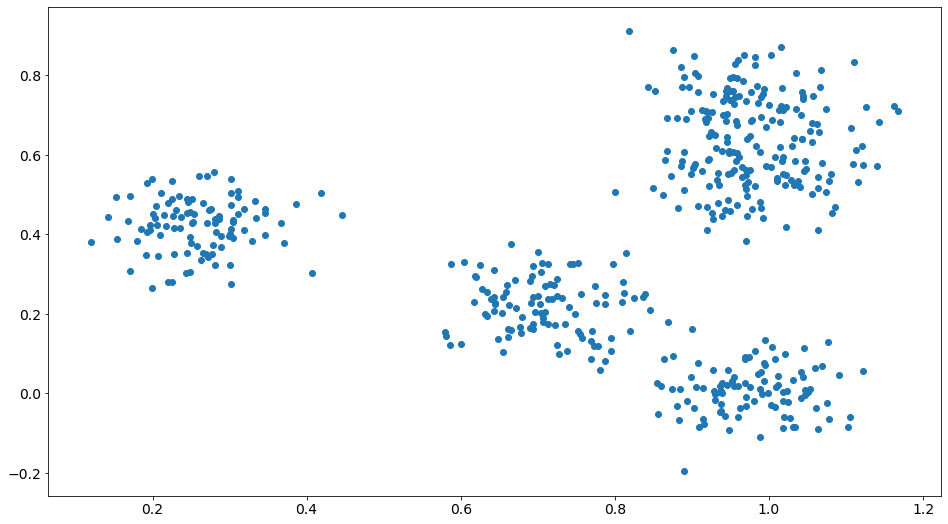

In [238]:
# your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1] )

### Problem 1.2

**Try this!** Using the functions `sample_centroids`, `fit`, and `plot_kmeans`, experiment with different `random_state`s to see if you can observe different final centroids depending on the initial starting points. Use the data sampled above and produce two plots in the two code cells provided below; one of them should show a reasonabley nice $k$-means solution. 

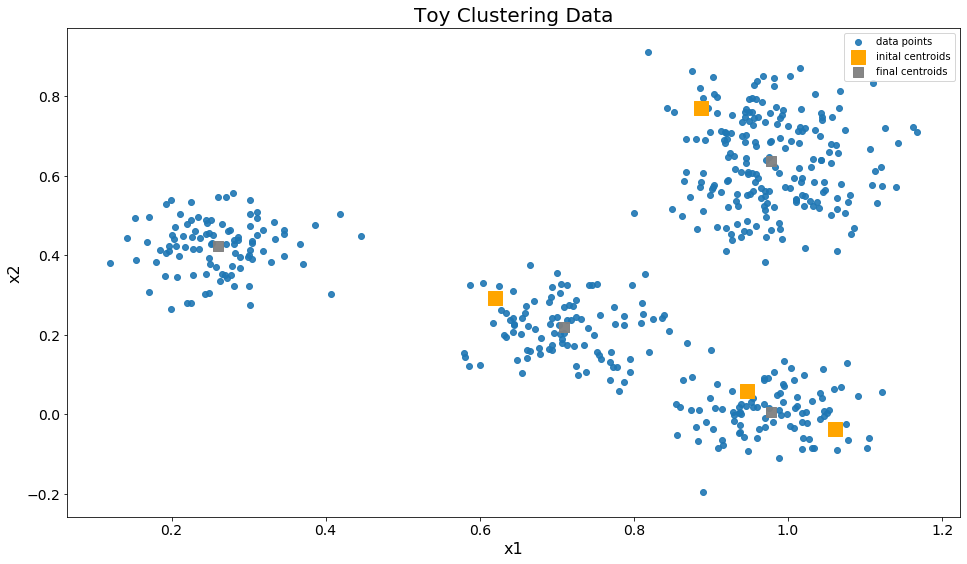

In [239]:
# your code here
centroids = sample_centroids(X, 4, random_state=9)
centroids2 = fit(X, 4)
plot_kmeans(X, centroids,centroids2[0])

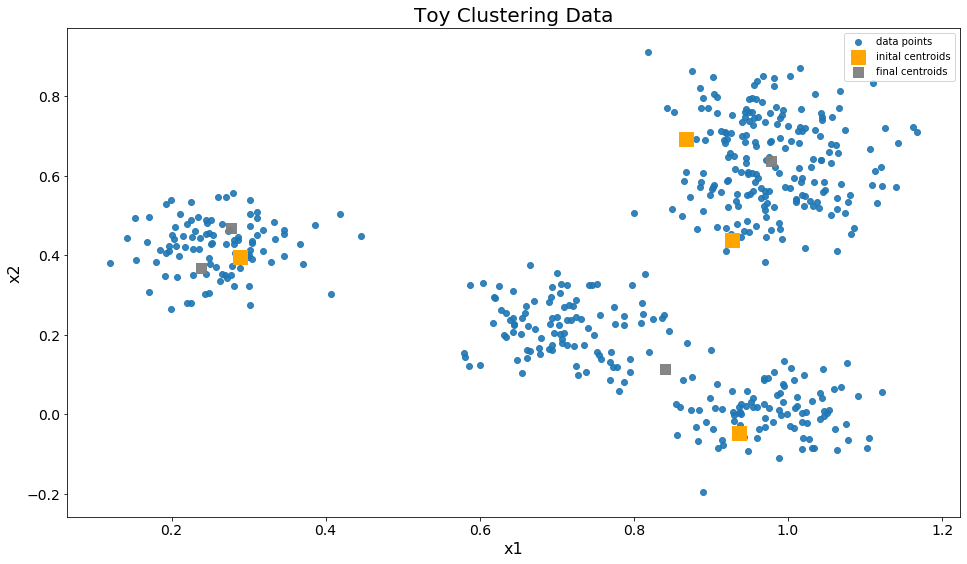

In [240]:
# your code here
centroids = sample_centroids(X, 4, random_state=12)
centroids2 = fit(X, 4)
plot_kmeans(X, centroids,centroids2[0])

### Problem 1.3

**Write-up!** What might be causing this to happen? How might we better choose our initial centroids? 

## 2. Using `sklearn` for $k$-means 

In this section, we will explore the [$k$-means model from `sklearn`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) and discuss some of the additional features supplied by their implementation. Before we begin, it is suggested that you work through Lab 7 if you haven't already as we will assume familiarity with the terms used there.

### Looking Into the Model

Now let's create a new $k$-means model and learn about it's interface. In general, you will find that the $k$-means model from `sklearn` shares a lot of the same methods as the other models that we have looked at. However, there are some differences that are notable.

In [241]:
from sklearn.cluster import KMeans

model = KMeans()

### Problem 2.1

**Write-up!** Use the IPython `?` operator to answer the following question: how do you specify the number of clusters you would like to fit?

In [242]:
# use this cell to explore
model?

Type:        KMeans
String form:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
File:        /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py
Docstring:  
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random'} or ndarray of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization, defaults to 'k-means++':

    'k-means++' : selects initial cluster centers for k-mean
    clustering in a smart way to speed up convergence. See section
    Notes in k_init for more details.

    'random': choose k observations (rows) at random from data for
    the initial centroids.

    If a

### Problem 2.2

**Write-up!** Use the IPython `?` operator to answer the following questions: How does the model initialize centroids by default? How does it work and why is it better than randomly choosing random starting centroids?

In [243]:
# use this cell to explore
model?

Type:        KMeans
String form:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
File:        /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py
Docstring:  
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random'} or ndarray of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization, defaults to 'k-means++':

    'k-means++' : selects initial cluster centers for k-mean
    clustering in a smart way to speed up convergence. See section
    Notes in k_init for more details.

    'random': choose k observations (rows) at random from data for
    the initial centroids.

    If a

### Problem 2.3

**Write-up!** Use the IPython `?` operator to answer the following questions: How does the model decide that the centroids have converged? Why might we need to adjust this based on our input data.

In [244]:
# use this cell to explore
model?

Type:        KMeans
String form:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
File:        /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py
Docstring:  
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random'} or ndarray of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization, defaults to 'k-means++':

    'k-means++' : selects initial cluster centers for k-mean
    clustering in a smart way to speed up convergence. See section
    Notes in k_init for more details.

    'random': choose k observations (rows) at random from data for
    the initial centroids.

    If a

### Clustering the Toy Data with `sklearn`

Let's try using `sklearn` to cluster our data.

### Problem 3.1

**Try this!** Create and fit a _new_ `KMeans` model of our data with the default arguments except for `random_state` which should be set to 11. _Be sure to store the fit centroids and assignments in variables for use later._

In [245]:
# your code here
model = KMeans(random_state=11).fit(X)
assignments = model.labels_
print(np.count_nonzero(assignments == 0))
print(np.count_nonzero(assignments == 1))
print(np.count_nonzero(assignments == 2))
print(np.count_nonzero(assignments == 3))
print(np.count_nonzero(assignments == 4))
print(np.count_nonzero(assignments == 5))
print(np.count_nonzero(assignments == 6))
print(np.count_nonzero(assignments == 7))
centroids = model.cluster_centers_
centroids.shape

51
63
100
84
52
53
46
51


(8, 2)

**Write-up!** How many centroids were fit by the model? How many points were assigned to each cluster?

### Problem 3.2

**Try this!** Create a plot showing the centroids that were produced by the model and the data points colored by their cluster assignment. Be sure to include any necessary plot components and remember that presentation matters.

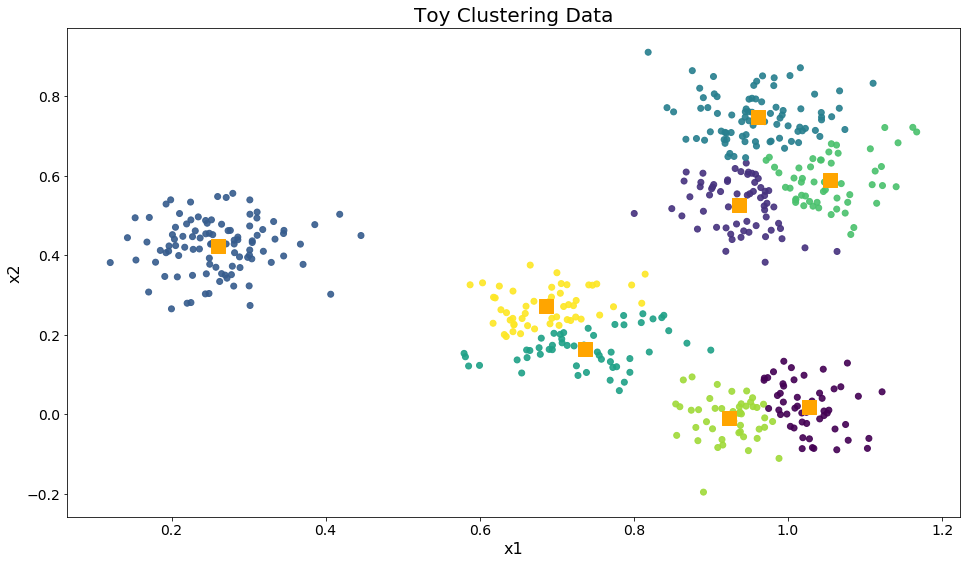

In [246]:
# your code here
plot_kmeans(X, centroids, assignments=assignments)

**Write-up!** Given this plot, do you think this is a reasonable clustering of the data?

### Problem 3.3

Consider the Sum of Squared Distances $SSD_j$ as the sum of all points in the $j$th cluster to its corresponsing cluster center $c_j$: 
$$SSD_j = \sum_{i=1}^{n} z_{ij} \;d(x_i,c_j)^2,$$
where $z_{ij}$ is 1 if $x_i$ belongs to cluster $j$ and 0 otherwise. 

Then, the objective function that $k$-means optimizes is the sum of the $SSD_j$ over all clusters. This means that, we want to find clusters of points that are close to one another. We can estimate how close the cluster points are to one another by measuring how far each point assigned to the cluster is from its center.


**Try this!** Use the elbow method described in both lecture and Lab 7 to find a good clustering for our data. Produce a plot that shows the model performance $SSD(k)$ as a function of $k$, where $SSD(k) = \sum_{j=1}^k SSD_j$.  Make sure to create new models when appropriate.

Text(0, 0.5, 'Sum SSD_k')

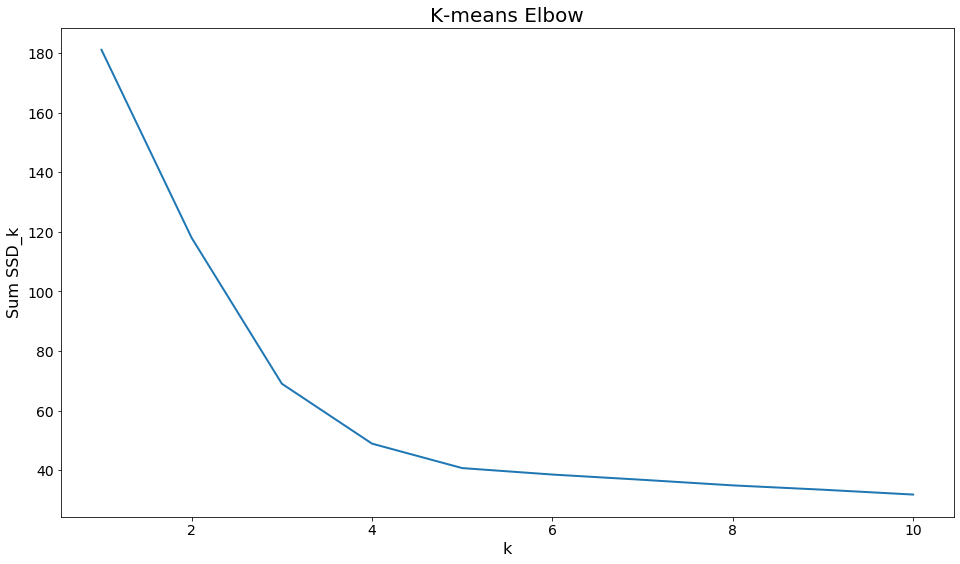

In [247]:
from utility.util import distance_measure

# your code here
ks = np.arange(1,11)
scores = []
for k in ks:    
    model = KMeans(n_clusters = k, random_state=11).fit(X)
    assignments = model.labels_
    centroids = model.cluster_centers_
    ssd = np.concatenate([distance_measure(X[assignments == cluster], centroids[cluster]) 
for cluster in np.unique(assignments)]).sum()
    scores.append(ssd)    
plt.plot(ks, scores)
plt.title('K-means Elbow')
plt.xlabel('k')
plt.ylabel('Sum SSD_k')

**Write-up!** State which $k$ you would choose and explain why. 

## 3. Tackling Employee Attrition


A real problem that Human Resources (HR) departments in companies across the work would like to address is employee attrition, or turnover. They would like to reduce the number of employees who leave the company as hiring new employees is expensive. In this section, we would like to see if we can make use of $k$-means to identify patterns in employee attrition so that we might suggest which areas an HR department should intervene in.

To show off there shiny Watson platform, IBM released a (fictional) [sample dataset](https://www.ibm.com/communities/analytics/watson-analytics-blog/hr-employee-attrition/) in 2015 containing employee statistics and whether or not they left the company. We'll use this dataset in our own exercise.

In [248]:
import pandas as pd

data = pd.read_csv('./utility/data/HR-Employee-Attrition.csv')
data.head()
print(data.shape)
data

(1470, 35)


Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

### Problem 4.1

With our problem in mind, the next thing to do is to acquire and process our data.

**Try this!** Describe the data in `HR-Employee-Attrition.csv` (`data`), answering questions including, but not limited to, these: How many examples and features does the dataset have? What kinds of features are in the dataset? What values can these features take?
> `Hint` Consider the steps of EDA; what would you like to know about this dataset. 

### Problem 4.2

Now that we have a feel for what data we have, let's do some data wrangling.

**Try this!** In the cells below (feel free to add more as you need them), explain and perform the steps that you need to prepare this data for further analysis. Make sure that your analysis and work is presented well and effectively communicates your work.
> In this process, consider whether each feature is informative (eg. EmployeeNumber might not be) and remove those that are not from your dataset. `Hint` You can use the `pandas.DataFrame.drop` function.

In [249]:
# your code here

#It seems as though everyone is over 18. Employee Number and Employee Count don't really provide interesting data.
data = data.drop(["Over18", "EmployeeNumber", "EmployeeCount"], axis = 1)

### Problem 4.3

Another step to do in our data processing phase is to replace categorical variables that are represented as strings with an enumeration. For example, `'Attrition'` has `'Yes'` and `'No'` values that we would like to encode as `1` and `0` respectively.

**Try this!** In the following cell, [`replace`](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) the string values in categorical variables with enumerations. Make uses of the `encoded` `DataFrame` which is a copy of `data`. `Hint` You can use the `unique` and `enumerate` functions to help you do this.

In [250]:
encoded = data.copy()

# your code here
datatype = encoded.dtypes
categorical = datatype[(datatype == 'object')].index.tolist()
for x in categorical:
    vals = np.unique(encoded[x])
    enum = enumerate(vals, 0)
    d=dict((i,j) for i,j in enum)
    di = dict([[v,k] for k,v in d.items()])
    encoded[x] = encoded[x].replace(di)
assert encoded.shape == data.shape, 'The encoded version of `data` should have the same shape'
assert np.all(encoded.dtypes == 'int64'), 'All values in `encoded` should be integers'

### Problem 4.4

Now that we have a processed dataset, let's move on to forming clusters with $k$-means. Normally, we would do some EDA here, but in the interest of time, we will forgo that part of the data science workflow. If you want to, we still encourage you to do so.

That said, we will need to prepare an $X$ matrix of our dataset. At this point, we will drop the `'Attrition'` column from our dataset. We will also [scale our data](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling). 

In [251]:
from sklearn.preprocessing import scale

X = scale(np.float64(encoded.copy().drop('Attrition', axis=1)))

**Try this!** In the cell below, build an elbow plot for $k \in [1, 21]$ as you did in [Problem 3.3](#Problem-3.3).

Text(0, 0.5, 'Sum SSD_k')

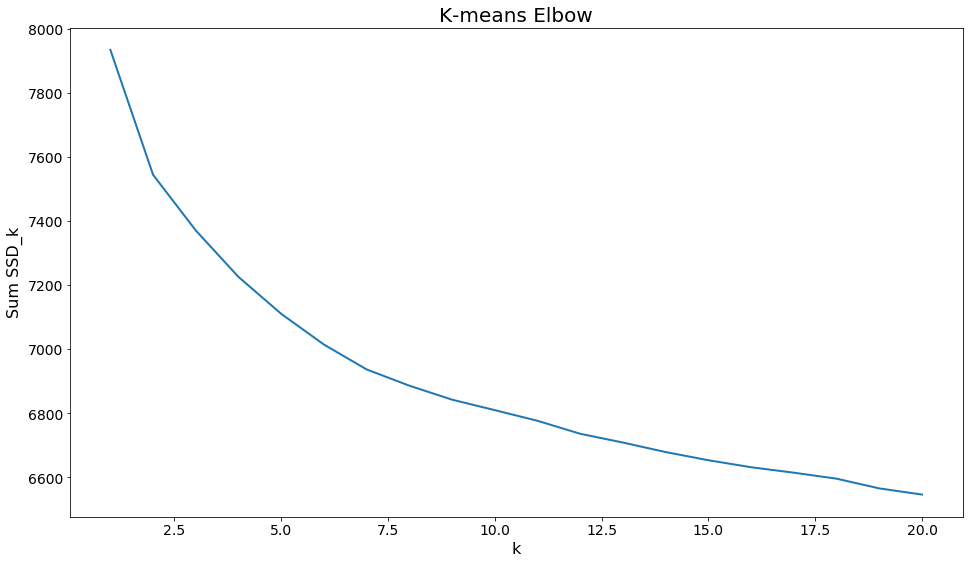

In [252]:
# your code here
# your code here
ks = np.arange(1,21)
scores = []
for k in ks:    
    model = KMeans(n_clusters = k, random_state=11).fit(X)
    assignments = model.labels_
    centroids = model.cluster_centers_
    ssd = np.concatenate([distance_measure(X[assignments == cluster], centroids[cluster]) 
for cluster in np.unique(assignments)]).sum()
    scores.append(ssd)    
plt.plot(ks, scores)
plt.title('K-means Elbow')
plt.xlabel('k')
plt.ylabel('Sum SSD_k')

**Write-up!** State which ùëò you would choose and explain why.

### Problem 4.5

**Try this!** Using the $k$ you selected in [Problem 4.4](#Problem-4.4), create and fit a new model. Remember to save the cluster assignments and centroids.

In [253]:
# your code here
model = KMeans(n_clusters = 6, random_state=11).fit(X)
assignments = model.labels_
centroids = model.cluster_centers_

### Problem 4.6

Now that we have cluster assignments from $k$-means, we need to analyze the significance of each cluster. To do that, let's return to our original DataFrame, `data`.

In the following cell, we add our cluster assignments to `data`. We also compute a pivot table which provides a summary of each cluster.

In [254]:
data['Cluster'] = assignments
pivot = data.pivot_table(index='Cluster', aggfunc=np.mean)

**Try this!** Compute the percentage of total attrition accounted for by each cluster and store the result in `pivot['% of Attrition']`.

In [259]:
# your code here
percent = []
numtot = data[data['Attrition'] == 'Yes'].shape[0]
dataYes = data[data['Attrition'] == 'Yes']
print(numtot)
for x in np.unique(data['Cluster']):
    dataX = dataYes[dataYes['Cluster'] == x].shape[0]
    #numYes = dataX[dataX["Attrition"]].shape[0]
    percent.append(round(dataX/numtot,3)*100)
pivot['% of Attrition'] = percent
print(pivot['% of Attrition'].sum())
assert pivot['% of Attrition'].sum() == 100, 'Sum of percentage attrition should be 1'

237
100.0


### Problem 4.7

Let's take a look at the results and identify potential areas for intervention to suggets to the HR department.

In [260]:
pivot.sort_values(by='% of Attrition', axis=0).T

Cluster                              4             0             5  \
Age                          48.809160     46.320611     36.342193   
DailyRate                   875.435115    753.580153    779.936877   
DistanceFromHome              9.351145      8.824427      9.388704   
Education                     3.160305      3.007634      3.076412   
EnvironmentSatisfaction       2.717557      2.603053      2.847176   
HourlyRate                   66.610687     65.572519     64.102990   
JobInvolvement                2.816794      2.618321      2.767442   
JobLevel                      3.786260      4.007634      2.119601   
JobSatisfaction               2.709924      2.625954      2.780731   
MonthlyIncome             14212.274809  15091.992366   6223.325581   
MonthlyRate               15981.679389  13870.465649  14039.292359   
NumCompaniesWorked            4.595420      2.885496      1.867110   
PercentSalaryHike            14.862595     15.290076     13.943522   
PerformanceRating             3.099237      3.183206      3.003322   
RelationshipSatisfaction      2.717557      2.923664      2.614618   
StandardHours                80.000000     80.000000     80.000000   
StockOptionLevel              0.770992      0.755725      0.903654   
TotalWorkingYears            22.854962     25.427481     12.122924   
TrainingTimesLastYear         2.679389      2.702290      2.873754   
WorkLifeBalance               2.763359      2.801527      2.754153   
YearsAtCompany                4.832061     21.221374     10.561462   
YearsInCurrentRole            3.106870      9.633588      7.591362   
YearsSinceLastPromotion       1.374046      7.687023      3.863787   
YearsWithCurrManager          2.625954      9.404580      7.674419   
% of Attrition                4.600000      5.100000     13.900000   

Cluster                              1             3             2  
Age                          34.856383     33.610619     33.931034  
DailyRate                   802.936170    824.349558    799.669371  
DistanceFromHome              9.819149      9.893805      8.567951  
Education                     2.792553      2.836283      2.803245  
EnvironmentSatisfaction       2.638298      2.725664      2.707911  
HourlyRate                   65.579787     66.154867     66.874239  
JobInvolvement                2.723404      2.668142      2.744422  
JobLevel                      1.659574      1.792035      1.334686  
JobSatisfaction               2.723404      2.685841      2.750507  
MonthlyIncome              4722.994681   5089.699115   3669.440162  
MonthlyRate               13923.872340  14750.765487  14102.318458  
NumCompaniesWorked            2.441489      2.707965      2.730223  
PercentSalaryHike            21.728723     14.119469     14.066937  
PerformanceRating             4.000000      3.000000      3.000000  
RelationshipSatisfaction      2.579787      2.663717      2.787018  
StandardHours                80.000000     80.000000     80.000000  
StockOptionLevel              0.808511      0.721239      0.770791  
TotalWorkingYears             8.664894      6.977876      6.898580  
TrainingTimesLastYear         2.787234      2.893805      2.772819  
WorkLifeBalance               2.755319      2.845133      2.718053  
YearsAtCompany                5.691489      3.619469      3.695740  
YearsInCurrentRole            3.856383      2.185841      2.117647  
YearsSinceLastPromotion       1.627660      0.699115      0.815416  
YearsWithCurrManager          3.776596      2.022124      2.044625  
% of Attrition               15.600000     24.100000     36.700000

**Write-up!** Describe the clusters produced and interpret their meaning. What makes each one a separate cluster? Is there anything that stands out with respect to attrition rate? What might you suggest HR look into to improve employee retention?